<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [1]:
#a)

import random
import matplotlib.pyplot as plt
import time


def roll(n):
    num=0
    while num < n:
        x=random.randrange(1,37)
        if x <=1:
            yield 1
        elif x <=3:
            yield 2
        elif x <=6:
            yield 3
        elif x <=10:
            yield 4
        elif x <=15:
            yield 5
        elif x <=21:
            yield 6  
        elif x <=28:
            yield 7
        elif x <=36:
            yield 8
        num += 1


<BarContainer object of 8 artists>

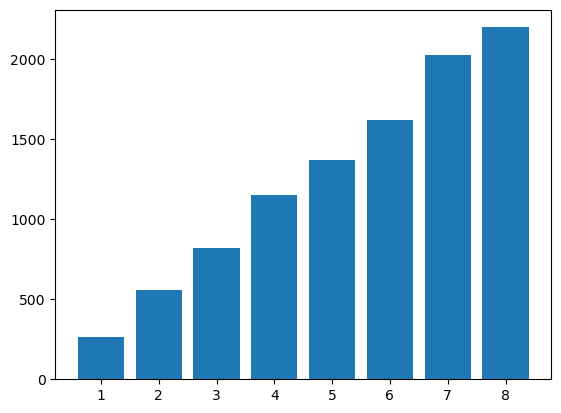

In [2]:
#b)
throws=list(roll(10000))
counts = [throws.count(i) for i in range(1, 9)]
plt.bar(range(1, 9), counts)


In [8]:
#c)
def timing_until_done(dice_generator):
    def wrapper():
        start = time.time()
        numbers_rolled = set()
        while len(numbers_rolled) < 8:
            number = next(dice_generator)
            numbers_rolled.add(number)
        total = time.time() - start
        print(f"All numbers rolled in {total:.4f} seconds.")
    return wrapper

timing_dice= timing_until_done(roll(1000))

timing_dice()

All numbers rolled in 0.0001 seconds.


### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

In [4]:
import time
import random
import numpy as np

In [5]:
class User:
    def __init__(self, name, start_floor, dest_floor):
        self.name=name
        self.start_floor=start_floor
        self.dest_floor=dest_floor
        
    def __str__(self):
        return f'{self.name} from floor {self.start_floor} wants to go to {self.dest_floor}' 
    
class Elevator:
    wait_per_floor=0 # should be 5
    wait_at_floor=1 # should be 10
    
    def __init__(self, num_of_floors): 
        self.num_of_floors=num_of_floors
        self.current_floor=0
        self.floors_to_visit=[]
        self.users=[]
        self.number_of_times_stopped_on_floor={}
        self.update_number_of_floors_visited(self.current_floor)
    
    def add_floor_to_visit(self, floor):
        # Functions used for adding, popping and printing from floors_to_visit
        if floor >= 0 and floor < self.num_of_floors:
            if not floor in self.floors_to_visit and not floor==self.current_floor:
                self.floors_to_visit.append(floor)
        
    def print_floors_to_visit(self):
        print("floors_to_visit =",self.floors_to_visit)
    
    def pop_floor_to_visit(self):
        # Pop means remove an item from a list/queue/set and return that item
        if len(self.floors_to_visit) > 0:
            # The easiest strategy is to take the first item (index 0)
            floor_to_visit=self.floors_to_visit.pop(0)
        else:
            # Nowhere to visit, so just stay where we are
            floor_to_visit=self.current_floor
        return floor_to_visit
    
    def update_number_of_floors_visited(self, floor):
        self.number_of_times_stopped_on_floor[floor]=self.number_of_times_stopped_on_floor.get(floor,0)+1
    
    def user_gets_on(self, user):
        self.add_floor_to_visit(user.dest_floor)
        self.users.append(user)
        # User gets on the elevator and selects their destination floor
        
    def remove_users_at_floor(self, floor):
        users_getting_off=[]
        for user in self.users:
            if user.dest_floor == floor:
                users_getting_off.append(user)
        for user in users_getting_off:
            print(user.name,"got off")
            self.users.remove(user)
    
    # User is at a floor and hits a button to get on the elevator
    def receive_call(self, floor):
        self.add_floor_to_visit(floor)
        
    def move_to_next_floor(self):
        next_floor=self.pop_floor_to_visit()
        if next_floor==self.current_floor:
            print("No need to move")
        else:
            print("Moving to floor ", next_floor)
            self.update_number_of_floors_visited(next_floor)
            time.sleep(self.wait_per_floor*(abs(next_floor-self.current_floor)))
            self.current_floor=next_floor
            self.remove_users_at_floor(self.current_floor)
            time.sleep(self.wait_at_floor)



In [7]:
num_floors=25
test_elevator=Elevator(num_floors)
names=["Bob","Alex","Trish","Andy","Mary","John","Alice","Cody","George","Sarah"]
users_waiting=[]
for name in names:
    start=random.randrange(num_floors)
    dest=start
    while dest==start:
        dest=random.randrange(num_floors)
    users_waiting.append(User(name,start,dest))

for user in users_waiting:
    print(user)
    test_elevator.receive_call(user.start_floor)

test_elevator.print_floors_to_visit()

while len(users_waiting)>0 or len(test_elevator.users)>0:
    curr_floor=test_elevator.current_floor
    print("\ncurrent floor is",curr_floor)
    users_getting_on=[]
    for user in users_waiting:
        if user.start_floor==curr_floor:
            users_getting_on.append(user)
    
    for user in users_getting_on:
        test_elevator.user_gets_on(user)
        users_waiting.remove(user)
        print(user.name,"got on")
        
    print("Users waiting:")
    for user in users_waiting:
        print("   ",user)
        
    print("Users in elevator:")
    for user in test_elevator.users:
        print("   ",user)
          
    test_elevator.print_floors_to_visit()
    test_elevator.move_to_next_floor()
    
print("The End")

print("\nFloors visited:")

for i in range(num_floors):
    print("floor ", i, ": ", test_elevator.number_of_times_stopped_on_floor.get(i,0))

Bob from floor 21 wants to go to 8
Alex from floor 11 wants to go to 19
Trish from floor 15 wants to go to 14
Andy from floor 10 wants to go to 5
Mary from floor 15 wants to go to 24
John from floor 24 wants to go to 6
Alice from floor 24 wants to go to 12
Cody from floor 11 wants to go to 0
George from floor 3 wants to go to 6
Sarah from floor 7 wants to go to 24
floors_to_visit = [21, 11, 15, 10, 24, 3, 7]

current floor is 0
Users waiting:
    Bob from floor 21 wants to go to 8
    Alex from floor 11 wants to go to 19
    Trish from floor 15 wants to go to 14
    Andy from floor 10 wants to go to 5
    Mary from floor 15 wants to go to 24
    John from floor 24 wants to go to 6
    Alice from floor 24 wants to go to 12
    Cody from floor 11 wants to go to 0
    George from floor 3 wants to go to 6
    Sarah from floor 7 wants to go to 24
Users in elevator:
floors_to_visit = [21, 11, 15, 10, 24, 3, 7]
Moving to floor  21

current floor is 21
Bob got on
Users waiting:
    Alex from f